# Part 1 : Data Preprocessing

## Importing libraries and dataset

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
dataset = pd.read_csv("train.csv")

## Data Exploration

In [128]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [129]:
dataset.shape

(1460, 81)

In [130]:
dataset.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [131]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [132]:
# statistical summary
dataset.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [133]:
# here are the numerical variables
dataset.select_dtypes(include = ['int64', 'float64']).columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [134]:
len(dataset.select_dtypes(include = ['int64', 'float64']).columns)

38

In [135]:
# here are the categorial variables
dataset.select_dtypes(include = ['object']).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [136]:
len(dataset.select_dtypes(include = ['object']).columns)

43

## Dealing with missing values

In [137]:
# checking if there is a null values or not
dataset.isnull().values.any()

True

In [138]:
# how many missing values of rows do we have on our dataset
dataset.isnull().values.sum()

6965

In [139]:
# missing values on each column
dataset.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [140]:
# all the columns with null values
dataset.columns[dataset.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [141]:
# waa imisa column oo missing values ah ku jiraan datasetkeena
len(dataset.columns[dataset.isnull().any()])

19

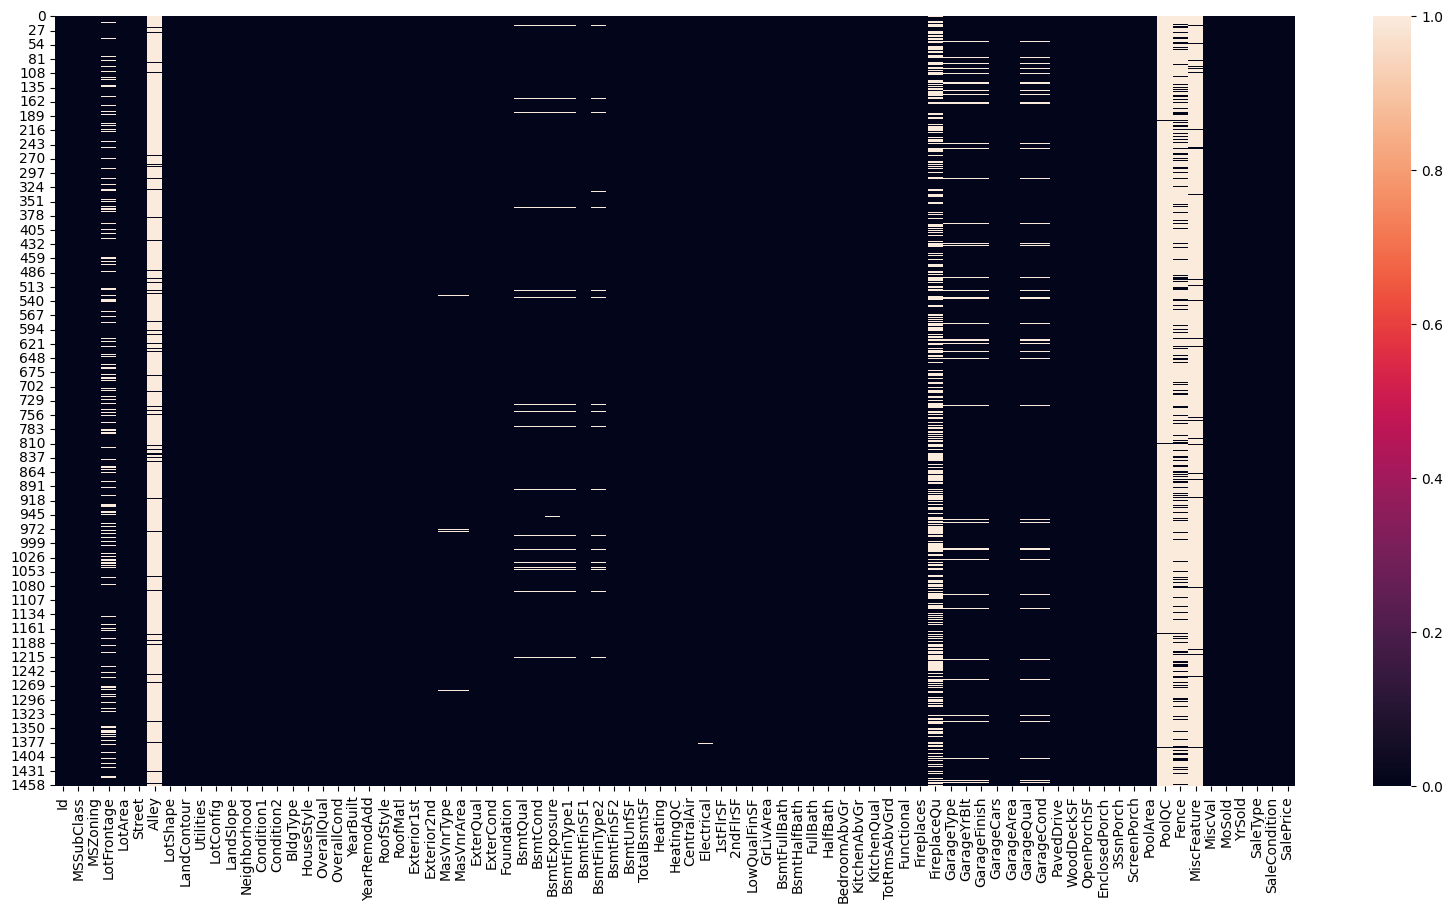

In [142]:
# null values with heatmap

plt.figure(figsize = (20, 10))
sns.heatmap(dataset.isnull())
plt.show()

In [143]:
dataset.shape

(1460, 81)

In [144]:
# (missing values / total values) * 1000
null_per = dataset.isnull().sum() / dataset.shape[0] * 100
null_per

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64

In [145]:
# columns that have more than 50% of null values.
cols_more_50_null = null_per[null_per > 50].keys()

In [146]:
cols_more_50_null

Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [147]:
# drop columns which have more than 50% of null values
dataset = dataset.drop(columns = ['Alley', 'PoolQC', 'Fence', 'MiscFeature'])

In [148]:
dataset.shape

(1460, 77)

In [149]:
# all the columns with null values
dataset.columns[dataset.isnull().any()]

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond'],
      dtype='object')

In [150]:
# there was 19, but we deleted 4 columns which have more than 50% of missing values
len(dataset.columns[dataset.isnull().any()])

15

**Add numerical columns to mean**

In [151]:
# missing values especially on numerical variables.
missing_columns = dataset.columns[dataset.isnull().any()].tolist()

missing_numerical_columns = dataset[missing_columns].select_dtypes(include=['float64', 'int64']).columns.tolist()

missing_numerical_columns

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [152]:
# change all missinng values variables that are numerical to mean
dataset['LotFrontage'] = dataset['LotFrontage'].fillna(dataset['LotFrontage'].mean())
dataset['MasVnrArea'] = dataset['MasVnrArea'].fillna(dataset['MasVnrArea'].mean())
dataset['GarageYrBlt'] = dataset['GarageYrBlt'].fillna(dataset['GarageYrBlt'].mean())

In [153]:
# there was 15, but we filled the numerical(3) to their mean
len(dataset.columns[dataset.isnull().any()])

12

In [154]:
# hadda wax missing ah maheesano oo numerical ah.
missing_numerical_columns

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

**Add categorical columns to mode**

In [155]:
# checking missing value variables that are categorical
missing_cat_columns = dataset[missing_columns].select_dtypes(include=['object']).columns.tolist()

missing_cat_columns

['MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [156]:
dataset['MasVnrType'] = dataset['MasVnrType'].fillna(dataset['MasVnrType'].mode()[0])

dataset['BsmtQual'] = dataset['BsmtQual'].fillna(dataset['BsmtQual'].mode()[0])
dataset['BsmtCond'] = dataset['BsmtCond'].fillna(dataset['BsmtCond'].mode()[0])
dataset['BsmtExposure'] = dataset['BsmtExposure'].fillna(dataset['BsmtExposure'].mode()[0])
dataset['BsmtFinType1'] = dataset['BsmtFinType1'].fillna(dataset['BsmtFinType1'].mode()[0])
dataset['BsmtFinType2'] = dataset['BsmtFinType2'].fillna(dataset['BsmtFinType2'].mode()[0])
dataset['Electrical'] = dataset['Electrical'].fillna(dataset['Electrical'].mode()[0])
dataset['FireplaceQu'] = dataset['FireplaceQu'].fillna(dataset['FireplaceQu'].mode()[0])
dataset['GarageType'] = dataset['GarageType'].fillna(dataset['GarageType'].mode()[0])
dataset['GarageFinish'] = dataset['GarageFinish'].fillna(dataset['GarageFinish'].mode()[0])
dataset['GarageQual'] = dataset['GarageQual'].fillna(dataset['GarageQual'].mode()[0])
dataset['GarageCond'] = dataset['GarageCond'].fillna(dataset['GarageCond'].mode()[0])

In [157]:
# as you can see, there is no null values on our dataset....
dataset.isnull().values.any()

False

## Distplot of the target vairble

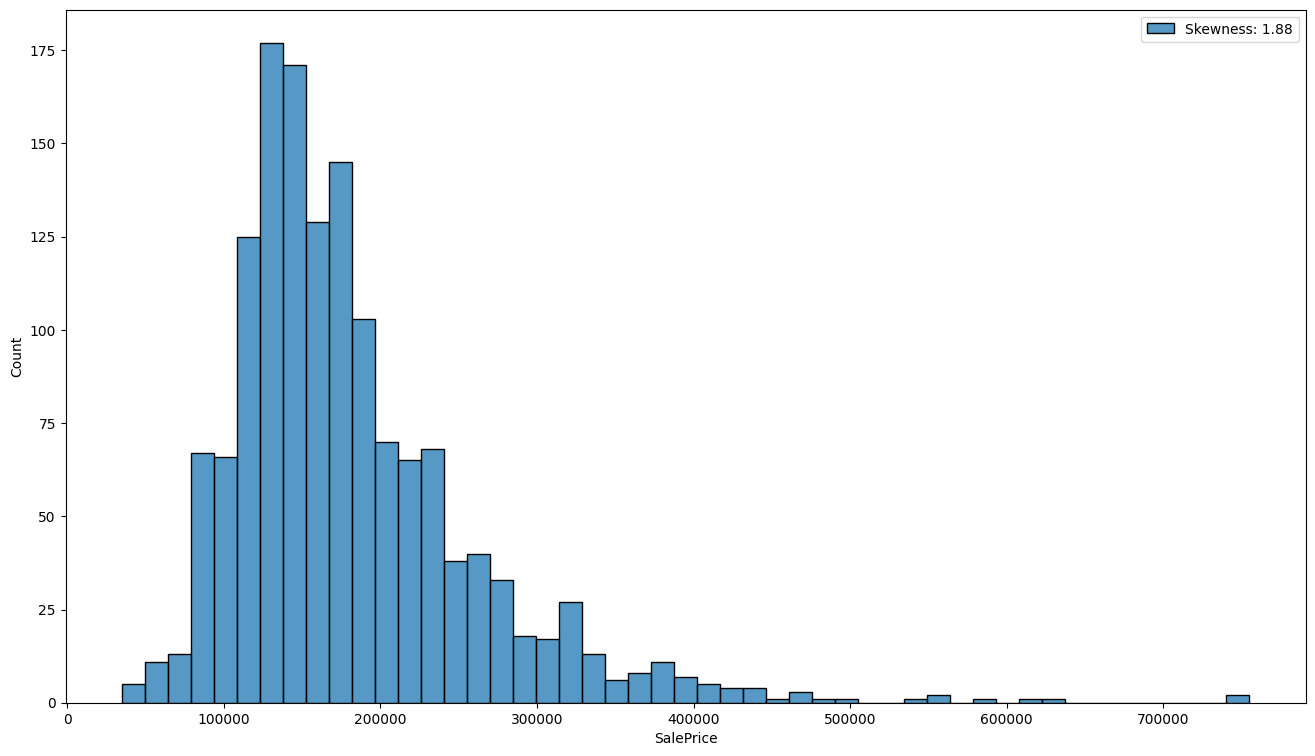

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 9))
bar = sns.histplot(dataset['SalePrice'])
bar.legend(["Skewness: {:.2f}".format(dataset['SalePrice'].skew())])
plt.show()

## Correlation matrix

In [159]:
dataset_2 = dataset.drop(columns ='SalePrice')

In [160]:
dataset_2.shape

(1460, 76)

<ipython-input-161-b38a33d2b08f>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset_2.corrwith(dataset['SalePrice']).plot.bar(


<Axes: title={'center': 'Correlated with saleprice'}>

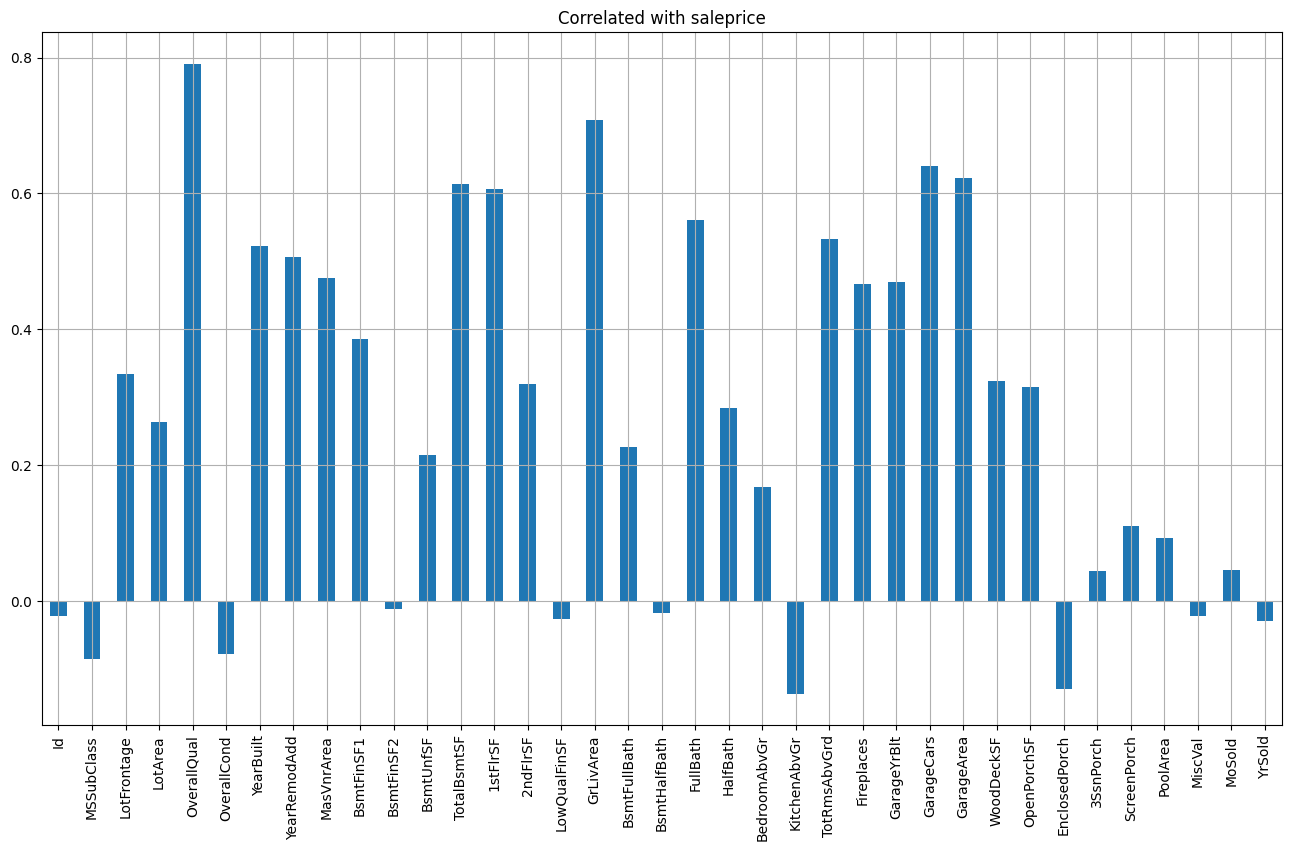

In [161]:
dataset_2.corrwith(dataset['SalePrice']).plot.bar(
    figsize=(16,9), title = "Correlated with saleprice", grid = True
)

<ipython-input-162-fa454ea80605>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(data = dataset.corr(), cmap = 'coolwarm', annot = True, linewidths = 2  )


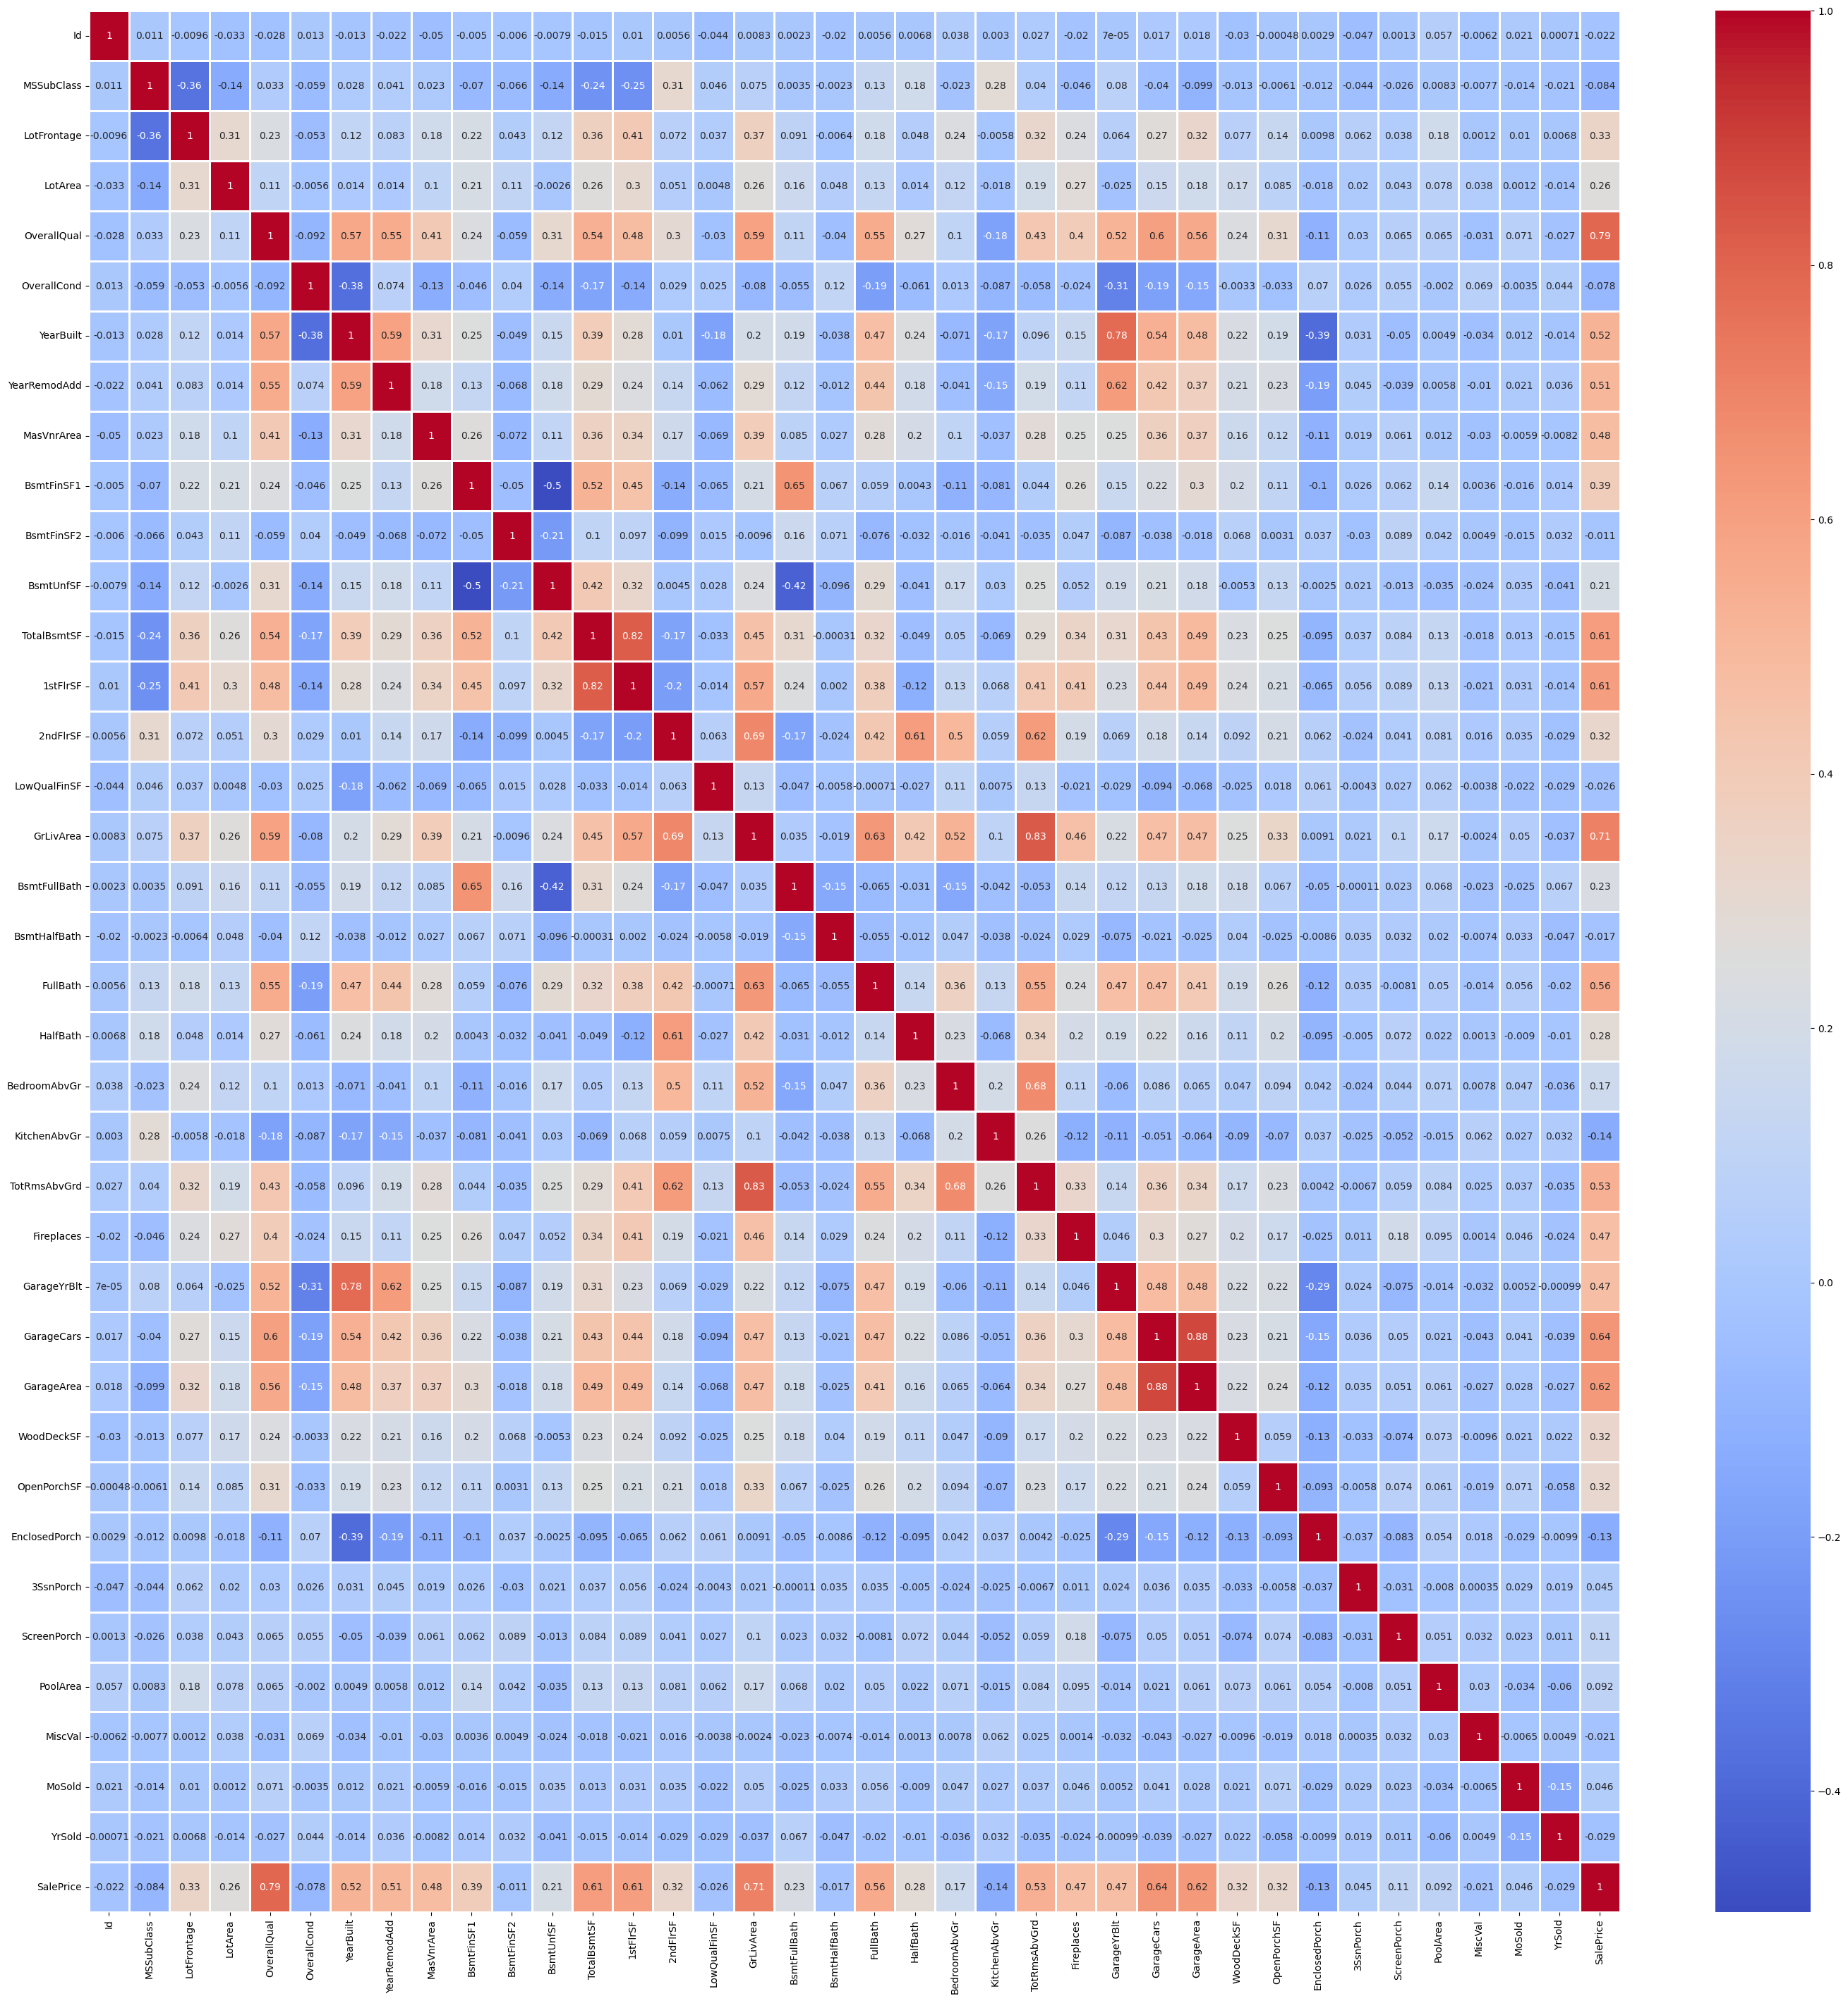

In [162]:
#heatmap
plt.figure(figsize=(35,35))
ax = sns.heatmap(data = dataset.corr(), cmap = 'coolwarm', annot = True, linewidths = 2  )

In [163]:
high_corr = dataset.corr()

<ipython-input-163-3d436edb0527>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  high_corr = dataset.corr()


In [164]:
high_corr_features = high_corr.index[abs(high_corr['SalePrice']) > 0.5]

In [165]:
high_corr_features

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')

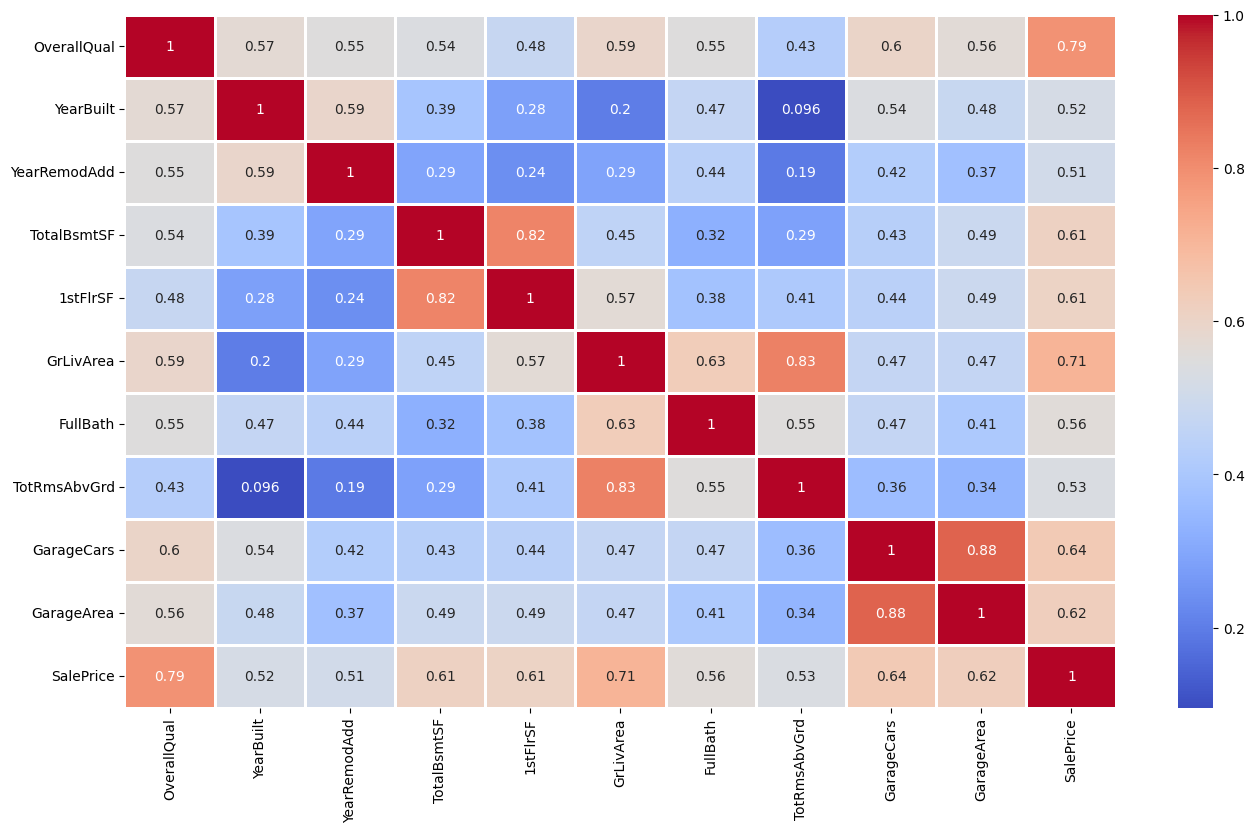

In [166]:
#heatmap with the highest correlation: more than 0.5 or 50%
plt.figure(figsize=(16,9))
ax = sns.heatmap(data = dataset[high_corr_features].corr(), cmap = 'coolwarm', annot = True, linewidths = 2  )

## Dealing with categorical Variables

In [167]:
dataset.shape

(1460, 77)

In [168]:
# here are the categorial variables
dataset.select_dtypes(include = ['object']).columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [169]:
# number of categorial columns on our dataset
len (dataset.select_dtypes(include = ['object']).columns)

39

In [170]:
dataset = pd.get_dummies(data=dataset, drop_first = True)

In [171]:
dataset.shape

(1460, 238)

In [172]:
# number of categorial columns on our dataset
len (dataset.select_dtypes(include = ['object']).columns)

0

## Splitting data into train and test

In [173]:
# independent varailes
x = dataset.drop(columns = 'SalePrice')
y = dataset['SalePrice']

In [174]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0 )

In [175]:
x_train.shape

(1168, 237)

In [176]:
y_train.shape

(1168,)

In [177]:
x_test.shape

(292, 237)

In [178]:
y_test.shape

(292,)

## Feature Scalling

In [179]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [180]:
x_train

array([[-0.28399978, -0.86836547,  0.9786782 , ..., -0.10188534,
        -2.20665963,  3.30429529],
       [ 0.31396549, -0.86836547, -0.46715589, ..., -0.10188534,
         0.45317365, -0.30263639],
       [-1.53213363, -0.63114155,  0.4967335 , ..., -0.10188534,
         0.45317365, -0.30263639],
       ...,
       [ 1.13498129,  0.79220197, -0.08160014, ..., -0.10188534,
         0.45317365, -0.30263639],
       [-0.42399958,  1.50387373,  0.01719652, ..., -0.10188534,
         0.45317365, -0.30263639],
       [-0.12738983,  0.08053021, -0.56354483, ..., -0.10188534,
         0.45317365, -0.30263639]])

In [181]:
x_test

array([[-0.49518592, -0.86836547,  0.01719652, ..., -0.10188534,
        -2.20665963, -0.30263639],
       [-0.58535529, -0.15669371,  0.44853903, ..., -0.10188534,
         0.45317365, -0.30263639],
       [-0.66128739, -0.15669371,  0.01719652, ..., -0.10188534,
         0.45317365, -0.30263639],
       ...,
       [ 1.54074343, -0.15669371, -0.46715589, ...,  9.81495458,
        -2.20665963, -0.30263639],
       [ 1.38887924, -0.63114155, -0.94910059, ..., -0.10188534,
         0.45317365, -0.30263639],
       [-1.60569284,  0.43636609, -0.46715589, ..., -0.10188534,
         0.45317365, -0.30263639]])

# Part 2: Building models

## Model 1: Linear Regression

In [182]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(x_train, y_train)




LinearRegression()

In [183]:
y_pred_lr = model_lr.predict(x_test)


In [184]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred_lr)



-3.5400367536523465e+21

## Model 2: Random Forest Regressor

In [185]:
from sklearn.ensemble import RandomForestRegressor

In [186]:
model_rf = RandomForestRegressor()
model_rf.fit(x_train, y_train)

RandomForestRegressor()

In [187]:
y_pred_rf = model_rf.predict(x_test)

In [190]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_rf)

0.8299374248131348

## XGBoost regression

In [191]:
from xgboost import XGBRFRegressor
model_xgb = XGBRFRegressor()
model_xgb.fit(x_train, y_train)


XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [192]:
y_pred_xgb = model_xgb.predict(x_test)

In [193]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_xgb)

0.8114231361056368

# Part 3: Predicting unseen data

## reading test data

In [194]:
test = pd.read_csv("test.csv")

In [195]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [196]:
test.shape

(1459, 80)

In [233]:
dataset.shape

(1460, 238)

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

## Dealing with missing valeus on the test data

In [199]:
# checking if there is a null values or not
test.isnull().values.any()

True

In [200]:
# how many missing values of rows do we have on our test
test.isnull().values.sum()

7000

In [202]:

# all the columns with null values
test.columns[test.isnull().any()]

Index(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType'],
      dtype='object')

In [203]:
# waa imisa column oo missing values ah ku jiraan test
len(test.columns[test.isnull().any()])

33

In [204]:
# (missing values / total values) * 1000
null_per = test.isnull().sum() / test.shape[0] * 100
null_per

Id                0.000000
MSSubClass        0.000000
MSZoning          0.274160
LotFrontage      15.558602
LotArea           0.000000
                   ...    
MiscVal           0.000000
MoSold            0.000000
YrSold            0.000000
SaleType          0.068540
SaleCondition     0.000000
Length: 80, dtype: float64

In [206]:
# columns that have more than 50% of null values.
cols_more_50_null = null_per[null_per > 50].keys()
cols_more_50_null


Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [207]:
# drop columns which have more than 50% of null values
# columnka FireplaceQu nullkiisa waxay ka badanyihiin 50%, lkakin ma delete arenkarno cause test and train waa qasab iney leyhn same columns
test = test.drop(columns = ['Alley', 'PoolQC', 'Fence', 'MiscFeature'])


In [208]:
test.shape


(1459, 76)

In [210]:

# all the columns with null values
test.columns[test.isnull().any()]


Index(['MSZoning', 'LotFrontage', 'Utilities', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'SaleType'],
      dtype='object')

In [212]:
# there was 33, but we deleted 4 columns which have more than 50% of missing values
len(test.columns[test.isnull().any()])


29

**Add Numerical Columns(test) to theri mean**

In [213]:
# missing values especially on numerical variables.
missing_columns = test.columns[test.isnull().any()].tolist()

missing_numerical_columns = test[missing_columns].select_dtypes(include=['float64', 'int64']).columns.tolist()

missing_numerical_columns

['LotFrontage',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea']

In [217]:
# change all missinng values variables that are numerical to mean
test['LotFrontage'] = test['LotFrontage'].fillna(test['LotFrontage'].mean())
test['MasVnrArea'] = test['MasVnrArea'].fillna(test['MasVnrArea'].mean())
test['GarageYrBlt'] = test['GarageYrBlt'].fillna(test['GarageYrBlt'].mean())

test['BsmtFullBath'] = test['BsmtFullBath'].fillna(test['BsmtFullBath'].mean())
test['BsmtFinSF1'] = test['BsmtFinSF1'].fillna(test['BsmtFinSF1'].mean())
test['BsmtFinSF2'] = test['BsmtFinSF2'].fillna(test['BsmtFinSF2'].mean())
test['BsmtUnfSF'] = test['BsmtUnfSF'].fillna(test['BsmtUnfSF'].mean())
test['TotalBsmtSF'] = test['TotalBsmtSF'].fillna(test['TotalBsmtSF'].mean())
test['BsmtHalfBath'] = test['BsmtHalfBath'].fillna(test['BsmtHalfBath'].mean())
test['GarageCars'] = test['GarageCars'].fillna(test['GarageCars'].mean())
test['GarageArea'] = test['GarageArea'].fillna(test['GarageArea'].mean())

In [218]:
# missing values especially on numerical variables.
missing_columns = test.columns[test.isnull().any()].tolist()

missing_numerical_columns = test[missing_columns].select_dtypes(include=['float64', 'int64']).columns.tolist()

missing_numerical_columns


[]

**Add cateogrical variables to their mode**

In [219]:
# missing values especially on numerical variables.
missing_columns = test.columns[test.isnull().any()].tolist()

missing_cat_columns = test[missing_columns].select_dtypes(include=['object']).columns.tolist()

missing_cat_columns

['MSZoning',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'SaleType']

In [220]:
test['MSZoning'] = test['MasVnrType'].fillna(test['MasVnrType'].mode()[0])

test['Utilities'] = test['Utilities'].fillna(test['Utilities'].mode()[0])
test['Exterior1st'] = test['Exterior1st'].fillna(test['Exterior1st'].mode()[0])
test['Exterior2nd'] = test['Exterior2nd'].fillna(test['Exterior2nd'].mode()[0])
test['MasVnrType'] = test['MasVnrType'].fillna(test['MasVnrType'].mode()[0])
test['BsmtQual'] = test['BsmtQual'].fillna(test['BsmtQual'].mode()[0])
test['BsmtCond'] = test['BsmtCond'].fillna(test['BsmtCond'].mode()[0])
test['BsmtExposure'] = test['BsmtExposure'].fillna(test['BsmtExposure'].mode()[0])
test['BsmtFinType1'] = test['BsmtFinType1'].fillna(test['BsmtFinType1'].mode()[0])
test['BsmtFinType2'] = test['BsmtFinType2'].fillna(test['BsmtFinType2'].mode()[0])
test['KitchenQual'] = test['KitchenQual'].fillna(test['KitchenQual'].mode()[0])
test['Functional'] = test['Functional'].fillna(test['Functional'].mode()[0])
test['FireplaceQu'] = test['FireplaceQu'].fillna(test['FireplaceQu'].mode()[0])
test['GarageType'] = test['GarageType'].fillna(test['GarageType'].mode()[0])
test['GarageFinish'] = test['GarageFinish'].fillna(test['GarageFinish'].mode()[0])
test['GarageQual'] = test['GarageQual'].fillna(test['GarageQual'].mode()[0])
test['GarageCond'] = test['GarageCond'].fillna(test['GarageCond'].mode()[0])
test['SaleType'] = test['SaleType'].fillna(test['SaleType'].mode()[0])

In [221]:
# missing values especially on numerical variables.
missing_columns = test.columns[test.isnull().any()].tolist()

missing_cat_columns = test[missing_columns].select_dtypes(include=['object']).columns.tolist()

missing_cat_columns

[]

In [224]:
test.isnull().values.any()

False

In [225]:
test.shape

(1459, 76)

In [226]:
dataset.shape

(1460, 238)

## dealing with categorical variables on test Data

In [227]:
test = pd.get_dummies(data=test, drop_first = True)

In [228]:
test.shape

(1459, 220)

In [229]:
dataset.shape

(1460, 238)

In [230]:
test.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,0,0,0,0,1,0,0,0,1,0
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,0,0,0,0,1,0,0,0,1,0
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,0,0,0,0,1,0,0,0,1,0
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,0,0,0,0,1,0,0,0,1,0
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,0,0,0,0,1,0,0,0,1,0


In [231]:
dataset.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,0,1,0,0,0,1,0


In [232]:
model_rf.predict(test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


ValueError: X has 220 features, but RandomForestRegressor is expecting 237 features as input.